# Introduction


### Dataset 

**Census Income** dataset.

More details: https://archive.ics.uci.edu/ml/datasets/Adult 


### Objective 

To predict whether income of an individual exceeds $50K/per year based on census data


# Code

Let's begin with `blackcellmagic` extension that helps in code formatting with `%%black` 

In [1]:
%load_ext blackcellmagic

### Loading required libraries

In [2]:
import numpy as np # numerical computing
import pandas as pd # dataframe manipulation
import seaborn as sns # static visualization
import matplotlib.pyplot as plt # static visualization
import plotly.express as px # interactive visualization

In [155]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,plot_importance
from sklearn.metrics import auc,accuracy_score,precision_recall_curve, confusion_matrix,plot_roc_curve
from sklearn.impute import KNNImputer

In [51]:
import warnings # to manage warnings on Jupyter notebook
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12,9)}) # size of seaborn plot

In [168]:
columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "educational_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "gender",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income",
]

#train = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep=",", header=None, names = columns, skipinitialspace = True ,skiprows = [0], na_values = '?')
#test = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", sep=",", header=None, names = columns, skipinitialspace = True ,skiprows = [0], na_values = '?')

In [169]:
train = pd.read_csv("adult.data.csv", sep=",\s", names=columns, na_values=[' ?','?'])
#test = pd.read_csv("adult.test.csv", sep=",\s", names=columns, na_values=[' ?','?'], skiprows=[0])

In [170]:
print("Dimension of Train Data : {0}". format(train.shape))
#print("Dimension of Test Data : {0}". format(test.shape))

Dimension of Train Data : (32561, 15)


In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          30725 non-null object
fnlwgt             32561 non-null int64
education          32561 non-null object
educational_num    32561 non-null int64
marital_status     32561 non-null object
occupation         30718 non-null object
relationship       32561 non-null object
race               32561 non-null object
gender             32561 non-null object
capital_gain       32561 non-null int64
capital_loss       32561 non-null int64
hours_per_week     32561 non-null int64
native_country     31978 non-null object
income             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [172]:
train.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Checking Missing Values

sns.heatmap(train.isnull(), cbar=False)

In [173]:
train.isnull().values.ravel().sum()m

SyntaxError: invalid syntax (<ipython-input-173-20970fbaf938>, line 1)

In [174]:
train.isnull().values.ravel().sum() / train.shape[0]

0.1308927858481005

### Dealing Missing Values

As we've identified above, we've got ~ 13% missing values in our Training data. Had it been in Continuous Variable, We could've imputed them using some naive imputation methods like `mean` / `median` but in our case, the missing values are in categorical variables. 

So, we can convert all those categorical variables into numeric varibles and then use such Imputation method or if we want something precise, we can use a `classifier` to predict the missing value and impute it. 

For this assignment (for the sake of simplicity and time), I'm going ahead with removing those missing values. 

In [175]:
train_nona = train.dropna()

### Basic EDA

### Univariate - Summary Stats

In [176]:
train_nona.describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [177]:
px.histogram(data_frame=train_nona,x = "age")

### Bivariate

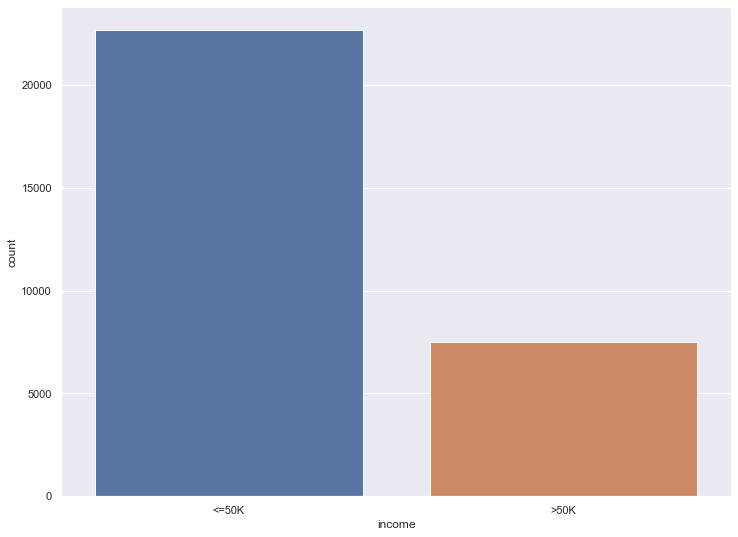

In [178]:
sns.countplot(train_nona['income'])
plt.show()

In [179]:
train_nona.income.value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

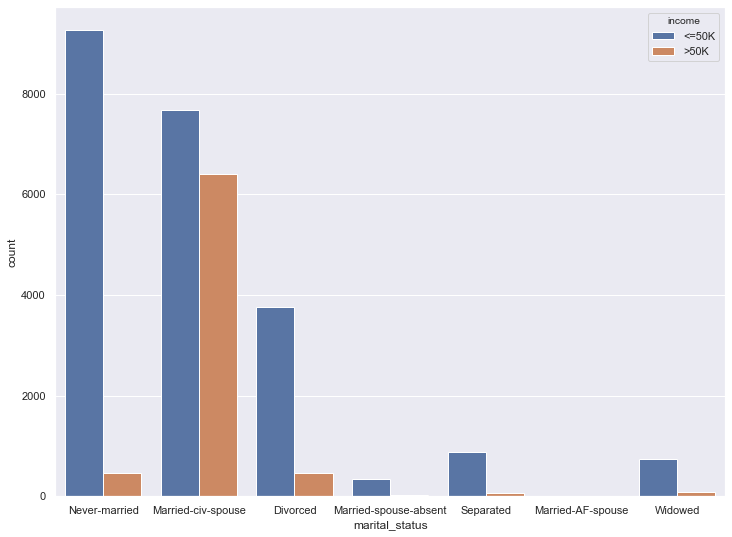

In [180]:
sns.countplot(train_nona['marital_status'], hue=train_nona['income']);

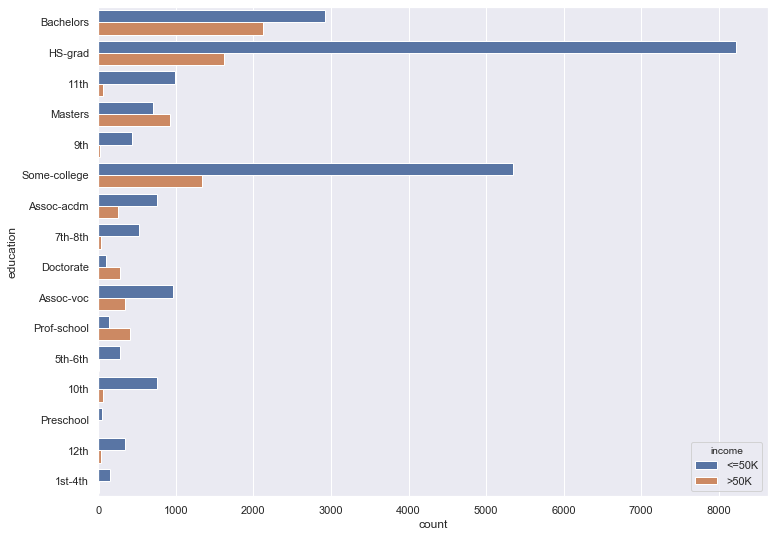

In [182]:
sns.countplot(y = train_nona['education'], hue=train_nona['income']);

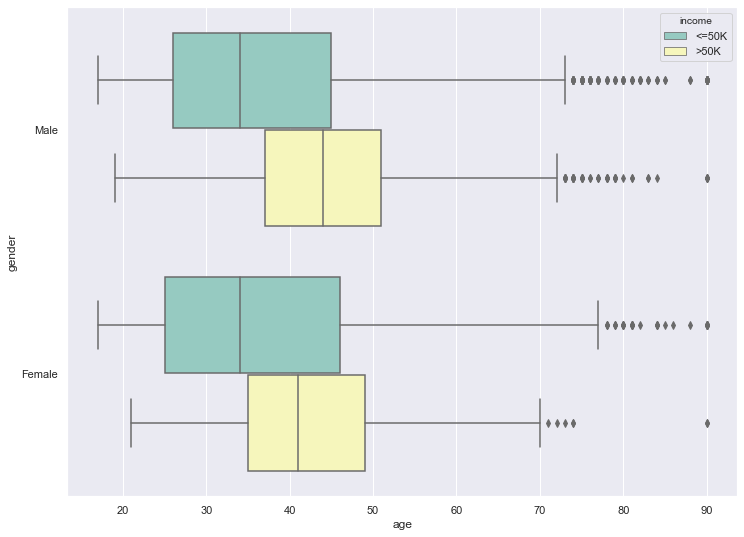

In [186]:
sns.boxplot(x="age", y="gender", hue="income", data=train_nona,palette="Set3")

### Label Encoding

In [115]:
#train_nona = train_nona.reset_index(drop=True)

In [116]:
train_nona = train_nona.apply(LabelEncoder().fit_transform)

In [117]:
train_nona.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0


### Relationship/Correlation between Variables 

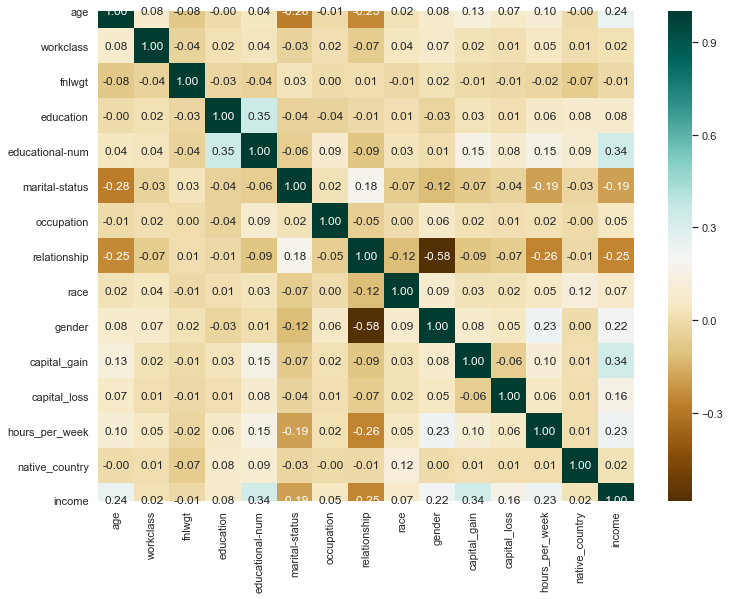

In [118]:
sns.heatmap(train_nona.corr(),annot=True,fmt='.2f',cmap="BrBG")
plt.show()

### Modelling

Creating Explanatory and Response Variables 

In [119]:
X = train_nona.iloc[:,0:-1]

y = train_nona[['income']]

### Splitting Train and Test for Cross Validation

In [120]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=122)

### Trying Different Classifiers for Prediction

We'll start with Logisitic Regression and go up to `xgboost` (Extreme Gradient Boosting). Also while building the model, we'll also evaluate the model with cross validation score, confusion matrix and ROC Curve (which also displays AUC Score) 

In [140]:
%%time
clf=LogisticRegression()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)
clf.fit(x_train,y_train)
predicted = clf.predict(x_test)

78.79511451559652
CPU times: user 6.33 s, sys: 962 ms, total: 7.29 s
Wall time: 2 s


In [141]:
confusion_matrix(y_test,predicted)

array([[6423,  383],
       [1475,  768]])

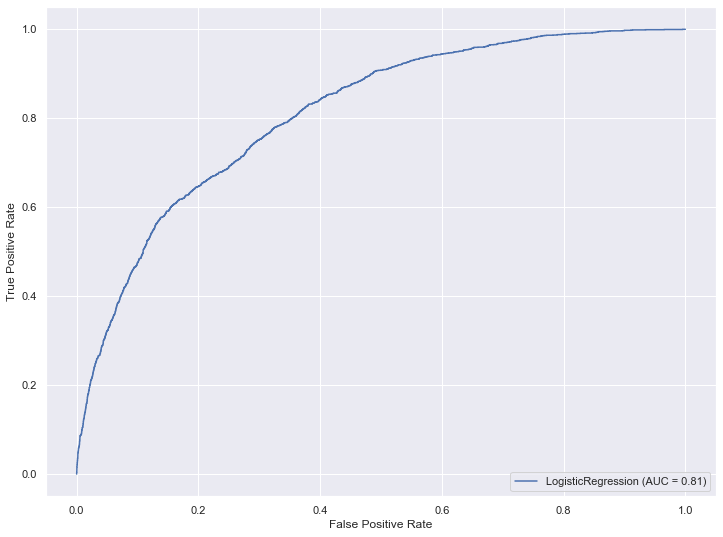

In [142]:
plot_roc_curve(clf, x_test, y_test)

In [143]:
%%time
clf=DecisionTreeClassifier()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)
clf.fit(x_train,y_train)
predicted = clf.predict(x_test)

80.33435521726024
CPU times: user 1.08 s, sys: 18.4 ms, total: 1.1 s
Wall time: 1.11 s


In [144]:
confusion_matrix(y_test,predicted)

array([[5949,  857],
       [ 868, 1375]])

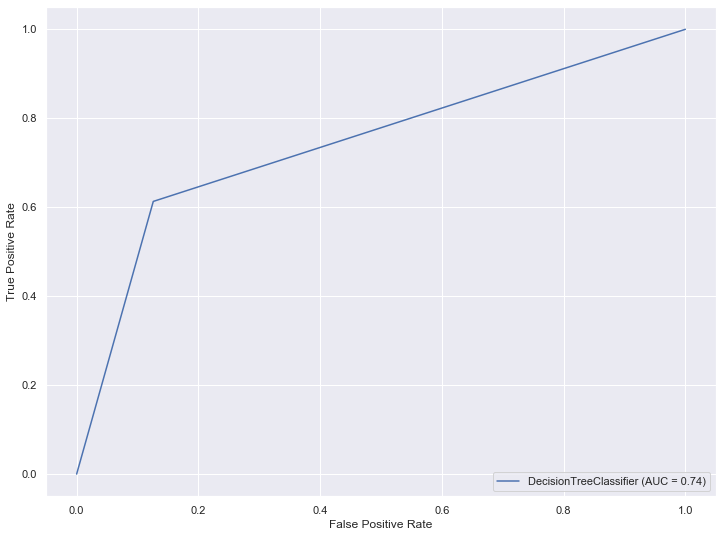

In [145]:
plot_roc_curve(clf, x_test, y_test)

In [149]:
%%time
clf=RandomForestClassifier(n_estimators=100)
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)
clf.fit(x_train,y_train)
predicted = clf.predict(x_test)

85.1087198369292
CPU times: user 20.6 s, sys: 507 ms, total: 21.1 s
Wall time: 21.3 s


In [150]:
confusion_matrix(y_test,predicted)

array([[6338,  468],
       [ 852, 1391]])

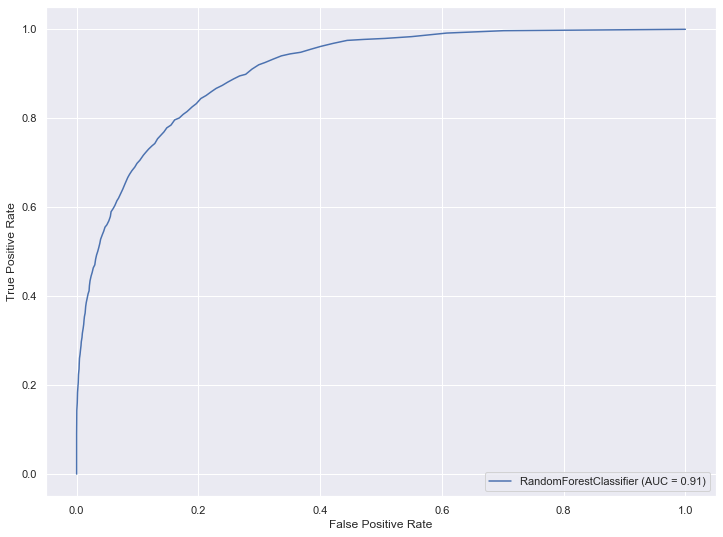

In [151]:
plot_roc_curve(clf, x_test, y_test)

In [152]:
%%time
clf=XGBClassifier()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)
clf.fit(x_train,y_train)
predicted = clf.predict(x_test)

86.20750748245122
CPU times: user 9 s, sys: 102 ms, total: 9.1 s
Wall time: 9.19 s


In [153]:
confusion_matrix(y_test,predicted)

array([[6456,  350],
       [ 900, 1343]])

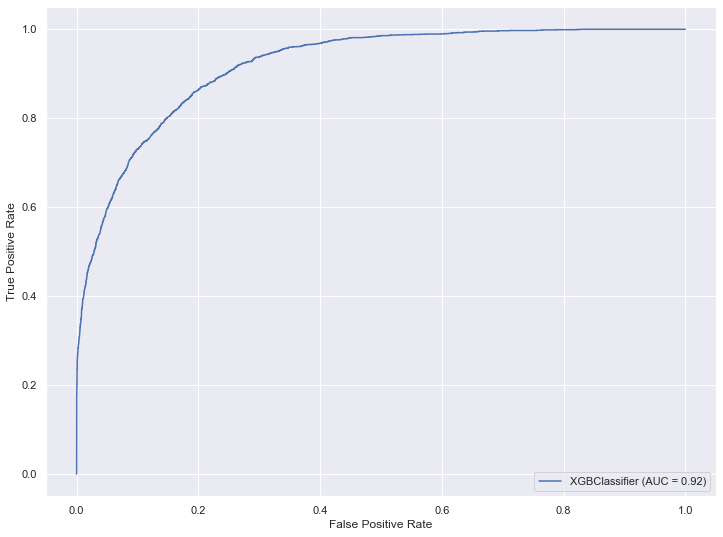

In [154]:
plot_roc_curve(clf, x_test, y_test)

### Model Result

Of all the models that we built, We could see `xgboost` performing the best with both AUC score and CV Score. It's also taken almost half the time of Random Forest, thus making it a better one if model has to be productionized or automted. 

### Model Interpretation - Important Variables

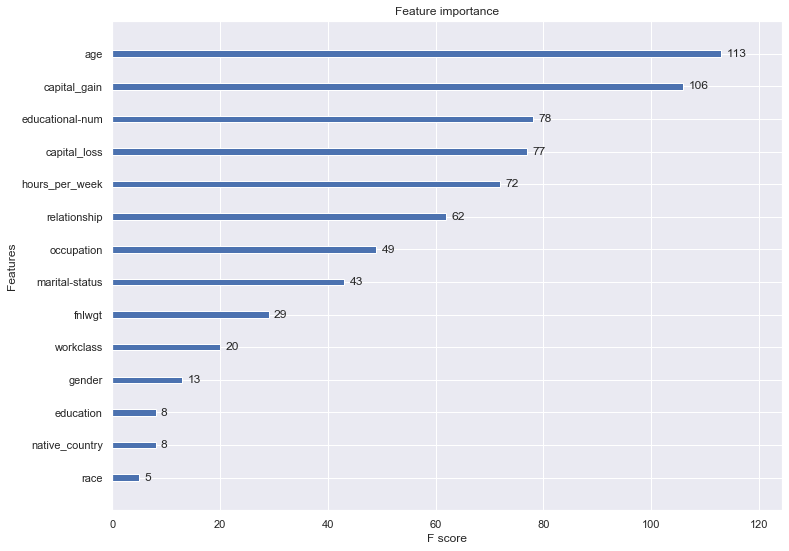

In [157]:
plot_importance(clf, max_num_features=15) 
plt.show()

# Business Explanation in English

+ Our Task at hand is to build an ML model that can predict if a given persons's income is <=50K or >50K

+ We've tried multiple ML techqniues and found an algorithm called "xgboost" (which stands for Extreme Gradient Boosting performing well

+ From the model we've understood that a person's `age`, `capital gain` and `education` related details being strong predictors in predicting the income class